In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_excel('ZF_Elec_Responses.xlsx')

In [140]:
df.head(5)

,Timestamp,Full Name (3 names at least),Phone Number,Email,Faculty - Department,Academic Year,Date of birth,Facebook URL,LinkedIn URL (optional),What do you know about Z Fast Racing Team?,How did you hear about us?,Do you have any volunteering experience?,"If yes, what is your volunteering experience?",What do you know about electrical vehicle ?,What do you know about competition we participate ?,What do you seek to learn by joining Z Fast Team?,Any questions?
0,2022-05-12 19:30:19.458,Mohamed Monir Mohamed,01210933802,mohameddobea13@gmail.com,Electrical engineering,3rd year,2000-11-11,https://www.facebook.com/Mohamed.Monir0,https://www.linkedin.com/in/mohamed-dobea-a911...,Z-Fast is the team that represents to Zagazig ...,Facebook,Yes,I have volunteered with AIESEC SOLVAKIAN organ...,It is an automotive vehicle that uses one or m...,EVER is giving young engineer the opportunity ...,I would like to improve my skills in embedded ...,NaN
1,2022-05-12 20:01:06.995,Mohammed Salah Aboshosha,01027463950,mohamedaboshosha12@gmail.com,Engineering - Electrical,2nd year,2001-10-27,https://www.facebook.com/Mohammedsalah.hasona,https://www.linkedin.com/in/mohammed-salah-hasona,Z Fast is a racing team which represents Zagaz...,"Facebook, Friends",Yes,Joined zag eng family for about one and half y...,To sum up electrical vehicles are vehicles tha...,EVER competition as Z Fast got the best Innova...,Learning more about embedded systems and elect...,No thanks
2,2022-05-12 20:15:51.354,mohamed salah fathy abdelhamid,01004257855,medosalahmedo4@gmail.com,engengineering-mechatronics,3rd year,2000-11-17,https://www.facebook.com/medo.salah210/,NaN,its a team represents Zagazig University in El...,"Facebook, Friends",No,this will be first time,An electric vehicle (EV) is one that uses an e...,i know that you make an electrical vehicle tha...,I am seeking to develop my skills in embedded ...,thanks
3,2022-05-12 20:17:26.297,Omar Saad Mohamed Saad Soliman,01149493914,mingosos13@gmail.com,Mechatronics,3rd year,2001-01-27,https://www.facebook.com/omar.saad.3726,https://www.linkedin.com/in/omar-soliman-a4198...,A team that makes an electric car and enter co...,"Facebook, Friends, Faculty colleagues",No,no thing,They are new vehicle that run on electric batt...,no thing,New skills in communication and working by my ...,no
4,2022-05-12 20:30:14.318,ماجد علاء السيد محمد,01013414668,Magedalaazsc@gmail.com,كلية الهندسة - أولى كهربا,2nd year,2002-02-24,https://www.facebook.com/maged.alaa.315,NaN,تيم طموح بيعمل حاجة عندي الشغف اتعلمها واطلع ط...,"Facebook, Friends",Yes,Zag Eng team ( for 6 months - now)\nResala cha...,صديقة للبيئة وموفرة وهي حاجة جديد ففيها مجال ل...,اسمها EVER تقريبا وخاصة بتصميم وتشغيل سيارات ا...,اتعلم اردوينو مهم بالنسبالي جدا وكمان جزء ال E...,Thanks


In [141]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Timestamp                                            90 non-null     datetime64[ns]
 1   Full Name (3 names at least)                         90 non-null     object        
 2   Phone Number                                         90 non-null     object        
 3   Email                                                90 non-null     object        
 4   Faculty - Department                                 90 non-null     object        
 5   Academic Year                                        90 non-null     object        
 6   Date of birth                                        90 non-null     datetime64[ns]
 7   Facebook URL                                         90 non-null     object        
 8   Li

<h2 style = "color :red">Cleaning</h2>

In [142]:
#renaming some columns to make it easier
df.rename(columns={'Full Name (3 names at least)': 'full_name' , "Phone Number":"phone_number",
                  "Faculty - Department":"Faculty_Department","Academic Year":"academic_year","Date of birth":"DOB",
                  "How did you hear about us?":"referral",
                  "If yes, what is your volunteering experience?":"volunteering",
                  "Any questions?": "questions"}, inplace=True)
##################################################
### removing rows with full name less than three words###

# Split the full_name 
name_components = df['full_name'].str.split()

# Check if the split contains at least three items (first name, middle name, last name)
valid_names = name_components.apply(lambda x: len(x) >= 3)

# Filter out rows with invalid names
df = df[valid_names]

# Check the filtered DataFrame
print(df.info(),"-*"*50,sep = "\n")

##################################################
### removing rows with invalid facebook URL###

# Define a regular expression pattern to match valid Facebook URLs
pattern = r'(?:https?://)?(?:www\.)?(?i)(?:m\.)?(?:fb\.com|facebook\.com)/[a-zA-Z0-9_.]+'

# Create a boolean mask indicating valid Facebook URLs
valid_facebook_urls = df['Facebook URL'].str.match(pattern, flags=re.IGNORECASE)

# Filter out rows with invalid Facebook URLs
df = df[valid_facebook_urls] ## quick note this will remove a row with a name manal ali , plz dont tell her i dont want to be "removed"🥺 
print(df.info(),"-*"*50,sep = "\n")

##################################################
### removing rows with invalid phone numbers ###

# Define a regular expression pattern to match valid phone numbers
pattern = r'^(\+201|01)\d{9}$'

# Create a boolean mask indicating valid phone numbers
valid_phone_numbers =df['phone_number'].notna() & df['phone_number'].str.match(pattern)
print(valid_phone_numbers.value_counts())
# Filter out rows with invalid phone numbers
df = df[valid_phone_numbers]

# Check the filtered DataFrame
print(df.info(),"-*"*50,sep = "\n")


### turning academic year to int ###
# Extract the first character from the academic year column and convert it to an integer
df['academic_year'] = df['academic_year'].str[0].astype(int)

##################################################
### Faculty and Department ###

#Replace arabic words
replacements = {
    'كهربا': 'Electric',
    'ميكانيكا': 'Mechanic',
    'ميكاترونكس':'mechatronics',
    'اعداى':'prep',
    'اعداي':'prep'
}
df["Faculty_Department"] = df["Faculty_Department"].replace(replacements,regex = True)

# Define the words to check for
words = ['electric', 'mechanic','mechatronics','fci','prep','communication']

# update 'faculty_department' column  based on whether the words are present in the 'faculty_department' column
df['Faculty_Department'] = df['Faculty_Department'].str.lower().apply(lambda x: next((word for word in words if word in x), ''))

#remove '' rows 
df = df[ df['Faculty_Department'] != '']
print(df['Faculty_Department'].value_counts())
print("-*"*50)

##################################################
### preparing volunteering ###

df.loc[df['Do you have any volunteering experience?'] == "No", 'volunteering'] = ''
df['volunteering'] = df['volunteering'].str.lower()
print(df['volunteering'])
df = df.drop('Do you have any volunteering experience?', axis=1)
print("-*"*50)

##################################################

### if you are wondering why i didn't validate the email, well that's because the regex for it is more than a 207 character
### and it's kinda scary :(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 89
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Timestamp                                            89 non-null     datetime64[ns]
 1   full_name                                            89 non-null     object        
 2   phone_number                                         89 non-null     object        
 3   Email                                                89 non-null     object        
 4   Faculty_Department                                   89 non-null     object        
 5   academic_year                                        89 non-null     object        
 6   DOB                                                  89 non-null     datetime64[ns]
 7   Facebook URL                                         89 non-null     object        
 8   Li

<h3 style = "color: red"> Day of Submission </h3>

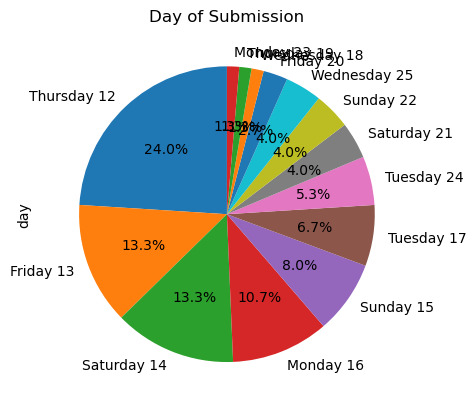

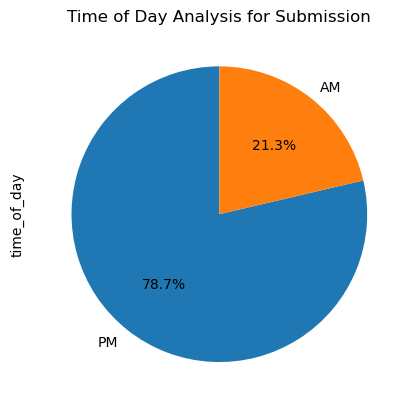

In [143]:
df["day"] =df["Timestamp"].dt.strftime("%A") + " " + df["Timestamp"].dt.strftime("%d")
df["time_of_day"] = df["Timestamp"].dt.strftime("%p")
#####################################################################
# Count the frequency of each unique value 
value_counts = df['day'].value_counts()

# Plot the pie chart
value_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Day of Submission')

# Display the chart
plt.show()
#####################################################################
# Count the frequency of each unique value 
value_counts = df['time_of_day'].value_counts()

# Plot the pie chart
value_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Time of Day Analysis for Submission')

# Display the chart
plt.show()


<h4 style="color : blue">Conclusion:<h4>
    <ul>
 <li><p>most of submissions were made in the evening, so it is best noted to always share it in the evening period</p></li>
  <li><p> most of submissions were in the frist 3 days meaning that the form was well marketed before release</p></li>
    </ul>

<h3 style="color:red">Faculty - Department</h3>

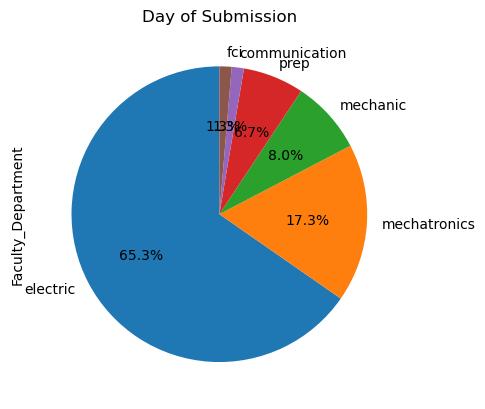

In [144]:
# Count the frequency of each unique value 
value_counts = df['Faculty_Department'].value_counts()

# Plot the pie chart
value_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Day of Submission')

# Display the chart
plt.show()
#####################################################################

<h4 style="color : blue">Conclusion:<h4>
    <ul>
 <li><p>most of submissions were electrical engineers</p></li>
  <li><p>it's needed to increase the attention to mechatronics and mechanical engineers as the event concern them just like it concerns electrical engineers.</p></li>
    </ul>

<h3 style="color:red">Academic Year</h3>

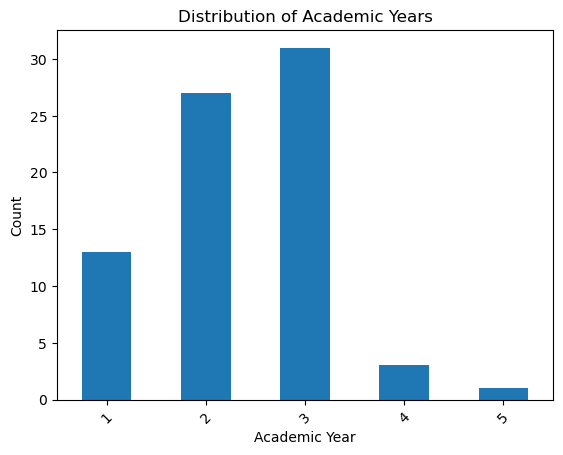

In [145]:
# Plot the distribution of academic years using a bar chart
df['academic_year'].value_counts().sort_index().plot.bar()

# Set the labels and title
plt.xlabel('Academic Year')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Academic Years')

# Display the plot
plt.show()

<h4 style="color : blue">Conclusion:<h4>
    <ul>
 <li><p>most of submissions were in 3rd academic year and 2nd academic year.</p></li>
    </ul>

<h3 style="color:red">Referral</h3>

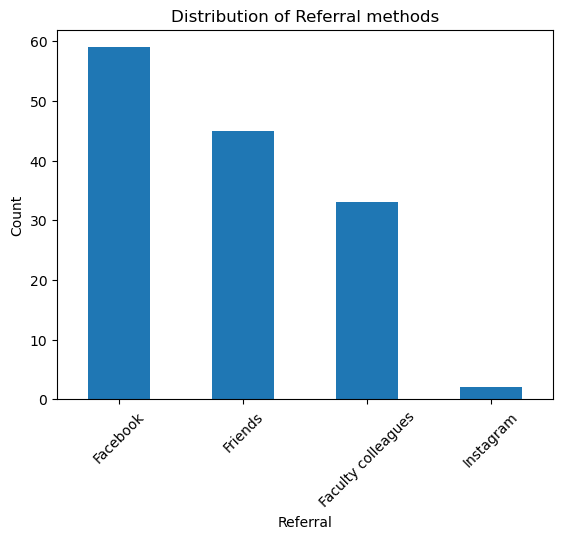

In [146]:
#the counts for referral methods
df['referral'].str.split(', ').explode().value_counts().plot.bar()
# Set the labels and title
plt.xlabel('Referral')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Referral methods')

# Display the plot
plt.show()

<h4 style="color : blue">Conclusion:<h4>
    <ul>
 <li><p>Facebook and whatsapp groups are the best ways to advertise the event.</p></li>
    </ul>

<h3 style="color:red">Volunteering</h3>

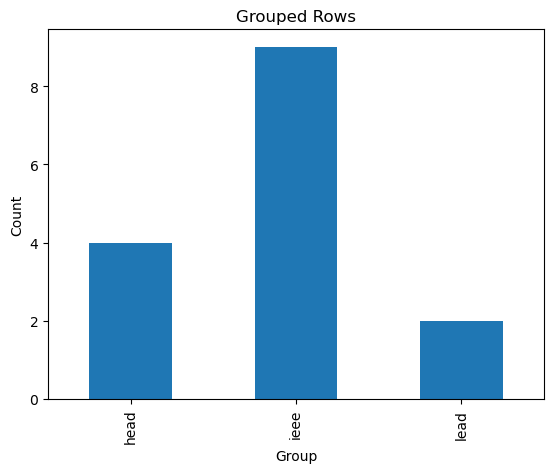

In [147]:
#extract words like lead , head , ieee
df['group'] = df['volunteering'].str.extract(r'(lead|head|ieee)', flags=re.IGNORECASE)

# Group the rows by the word
grouped_df = df.groupby('group').size()

# Plot the grouped data
grouped_df.plot(kind='bar')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Grouped Rows')

# Show the plot
plt.show()

<h4 style="color : blue">Conclusion:<h4>
    <ul>
 <li><p>8 people in IEEE and about 6 had the title lead or head</p></li>
    </ul>

<h3 style="color:red">Writing effort</h3>

count      75.000000
mean      495.306667
std       394.317473
min         4.000000
25%       217.500000
50%       395.000000
75%       696.500000
max      2076.000000
Name: effort, dtype: float64


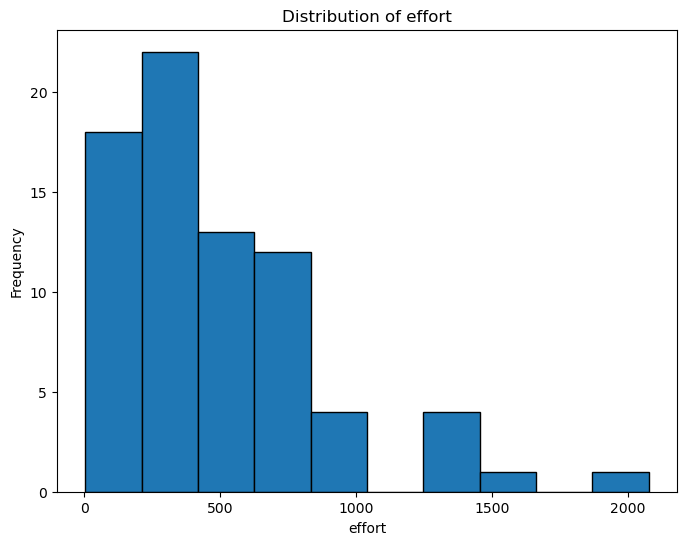

In [148]:
### summing the length for every answer about the event ###
df['What do you know about competition we participate ?'] = df['What do you know about competition we participate ?'].astype(str)
df['What do you know about electrical vehicle ?'] = df['What do you know about electrical vehicle ?'].astype(str)
df['What do you know about Z Fast Racing Team?'] = df['What do you know about Z Fast Racing Team?'].astype(str)
df['What do you seek to learn by joining Z Fast Team?'] = df['What do you seek to learn by joining Z Fast Team?'].astype(str)

df['effort'] =  df['What do you know about Z Fast Racing Team?'].str.len() \
              + df['What do you know about electrical vehicle ?'].str.len() \
              + df['What do you know about competition we participate ?'].str.len()\
              + df['What do you seek to learn by joining Z Fast Team?'].str.len()

effort_description = df['effort'].describe()

# Print the statistical summary
print(effort_description)

# Create a histogram to visualize the distribution of the column
plt.figure(figsize=(8, 6))
plt.hist(df['effort'], bins=10, edgecolor='black')
plt.xlabel('effort')
plt.ylabel('Frequency')
plt.title('Distribution of effort')
plt.show()

<h4 style="color : blue">Conclusion:<h4>
    <ul>
 <li><p>for the effort column, the distribution is right skewed that means only few people put a great effort filling the form and that means easier selection phase 🤭 👉👈 </p></li>
    </ul>

<h3 style="color:red">Question</h3>

In [149]:
# Change the data type to string
df['questions'] = df['questions'].astype(str)
#apply regex to check for a question mark
df['is_question'] = df['questions'].str.contains(r'[\?؟]$')
print(df[df['is_question']]['questions'])


17                  I'm in another college can I join ?
49    If I am not accepted, can you send me a feedba...
89    How much time and effort should I put in the t...
Name: questions, dtype: object


<h4 style="color : blue">Conclusion:<h4>
    <ul>
 <li><p>Only 3 people asked questions.</p></li>
    </ul>